#Task 1
## Data Cleaning & Preprocessing

Objective: Learn how to clean and prepare raw data for ML

## Import the Dataset and Explore Basic Info

### Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset:



In [29]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


### Explore Basic Info:



In [30]:
# Display the first few rows
print(df.head())

# Check data types and null values
print(df.info())

# Summary statistics
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

##Handle Missing Values

###Identify Missing Values:



In [10]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Cabin    687
dtype: int64


###Handle Missing Values:



In [6]:
#For numerical features, you can use mean or median:
df['Age'] = df['Age'].fillna(df['Age'].median())  # Using median for Age
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  # Using mean for Fare

In [7]:
#For categorical features, you can use mode or a placeholder:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Using mode for Embarked

## Convert Categorical Features into Numerical

###Encoding Categorical Features:


In [8]:
#Use one-hot encoding for nominal variables:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


##Normalize/Standardize Numerical Features


###Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


###Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


##Visualize Outliers Using Boxplots and Remove Them

###Visualize Outliers



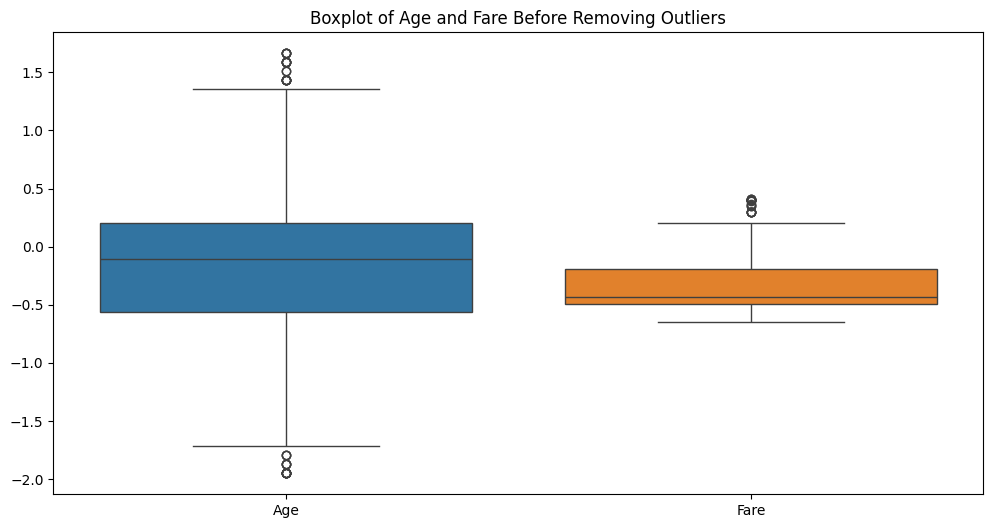

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare Before Removing Outliers')
plt.show()

###Remove Outliers



In [19]:
# Define thresholds for Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age


In [20]:
# Define thresholds for Fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare


In [21]:
# Remove outliers for Age
df = df[(df['Age'] >= (Q1_age - 1.5 * IQR_age)) & (df['Age'] <= (Q3_age + 1.5 * IQR_age))]


In [22]:
# Remove outliers for Fare
df = df[(df['Fare'] >= (Q1_fare - 1.5 * IQR_fare)) & (df['Fare'] <= (Q3_fare + 1.5 * IQR_fare))]


In [23]:
# Shape of the DataFrame after removing outliers
print(f"DataFrame shape after removing outliers: {df.shape}")


DataFrame shape after removing outliers: (677, 13)


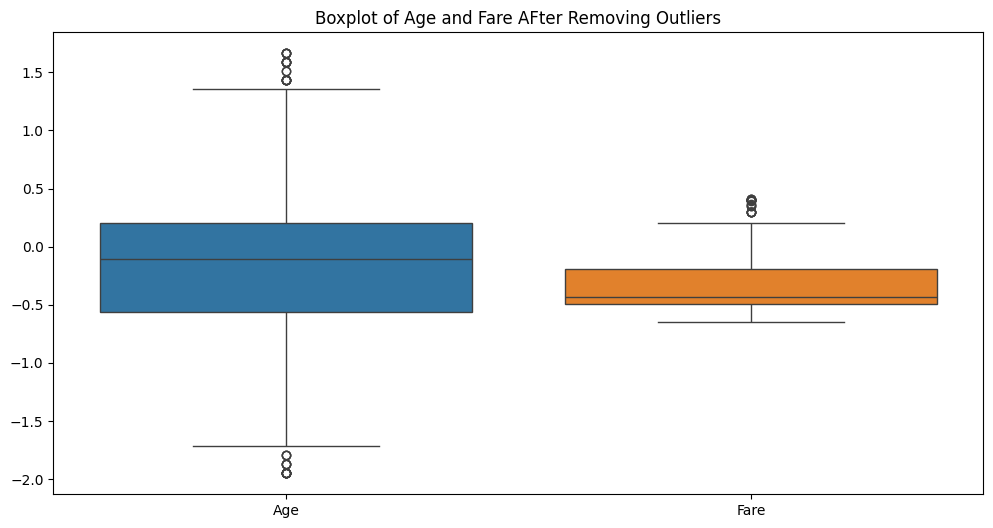

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare AFter Removing Outliers')
plt.show()